# Proyecto 9: Tomar decisiones de negocios basadas en datos

Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.



## Priorizar hipótesis

In [24]:
#cargaremos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
#Descargamos los datos
hipotesis = pd.read_csv('hypotheses_us.csv', sep=';')
orders = pd.read_csv('orders_us.csv')
visits = pd.read_csv('visits_us.csv')

### Preparación de los datos

#### Optimización de datos

In [26]:
#Revisamos los datos de hipotesis
hipotesis.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [27]:
hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [28]:
#Revisamos los datos de orders
orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [29]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [30]:
#modificamos los datos de date 
orders['date'] =  pd.to_datetime(orders['date'], format="%Y-%m-%d")

In [31]:
#revisamos el archivo visits
visits.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [32]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [33]:
visits['date'] =  pd.to_datetime(visits['date'], format="%Y-%m-%d")

#### Revisión de duplicados

In [34]:
orders.duplicated().sum()

0

In [35]:
visits.duplicated().sum()

0

#### Revisa que no hayan visitantes que coincidan en ambos grupos

In [36]:
# Identificar visitantes que están en ambos grupos
group_counts = orders.groupby('visitorId')['group'].nunique()
visitor_ab = group_counts[group_counts > 1].index

#Mostrar solo esos visitantes
visitors_ab = orders[orders['visitorId'].isin(visitor_ab)]

visitors_ab.info()


<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 2 to 1195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  181 non-null    int64         
 1   visitorId      181 non-null    int64         
 2   date           181 non-null    datetime64[ns]
 3   revenue        181 non-null    float64       
 4   group          181 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 8.5+ KB


In [37]:
#Procederemos a eliminarlos ya que puede deberse a un error en la aplicación de la prueba
orders_ = orders[~orders['visitorId'].isin(visitors_ab)]


### Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [38]:
#Calculamos ice
hipotesis['ICE'] = (hipotesis['Impact']*hipotesis['Confidence'])/hipotesis['Effort']

#reordenamos
hipotesis = hipotesis.sort_values(by='ICE', ascending=False)

hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


### Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [39]:
#Calculamos rice multiplicando ice por reach
hipotesis['RICE'] = hipotesis['ICE']*hipotesis['Reach']

#reordenamos
hipotesis = hipotesis.sort_values(by='RICE', ascending=False)

hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


### Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

Text(0.5, 1.0, 'Variación entre ICE y RICE')

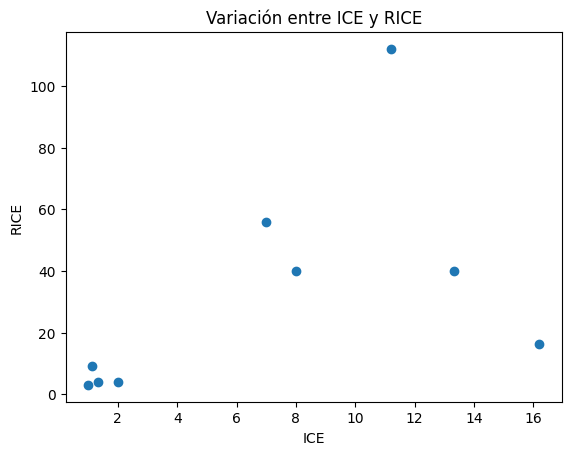

In [40]:
#Creamos un gráfico de dispersión para ver la variación de la importancia según ambos parametros
plt.scatter(hipotesis["ICE"], hipotesis["RICE"])
plt.xlabel("ICE")
plt.ylabel("RICE")
plt.title("Variación entre ICE y RICE")

Nos encontramos con hipótesis que mantienen su importancia en ambos criterios, es decir que se mantienen en una linea de 45 grados en la gráfica, lo que significa que su posición de importancia no se altera. Por otro lado hay hipótesis que tienen un valor alto en ICE como la que se encuentra después del valor 16 (mucha importancia) y que de acuerdo con RICE no se considera importante ya que su valor es de aproximadamente 20 (poca importancia), así como también hay hipótesis que alzan su valor de importancia al incluir el Reach como es el caso de la que se encuentra cerca de 12 en ICE pero en RICE su valor sube significativamente arriba de 100. Entre mayor sea el valor de Reach, mayor será el impacto que tendrá sobre ICE. Al considerar una linea imaginaria de 45 grados que atraviesa la gráfica, los valores que se encuentren por debajo de la linea representan las hipótesis que perdieron importancia al considerar el alcance, y aquellos que están sobre la linea son los que ganaron alcance.

## Análisis del test A/B

### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [41]:
#Calculamos las ordenes diarias acumuladas, agrupando por fecha y grupo
daily_orders = orders_.groupby(['date', 'group'])['revenue'].sum().reset_index()
#Agregamos una columna con el ingreso acumulado
daily_orders['cumulative_revenue'] = daily_orders.sort_values(by='date').groupby('group')['revenue'].cumsum()
daily_orders.head()

,date,group,revenue,cumulative_revenue
0,2019-08-01,A,2356.8,2356.8
1,2019-08-01,B,1620.0,1620.0
2,2019-08-02,A,1503.5,3860.3
3,2019-08-02,B,2623.8,4243.8
4,2019-08-03,A,1815.2,5675.5


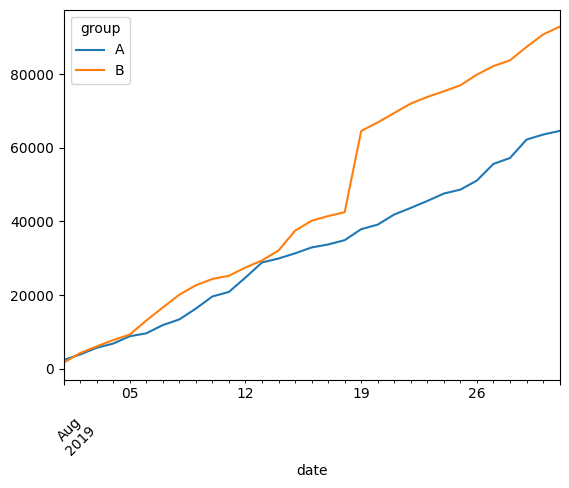

In [42]:
#Creamos una pivot table para graficar la suma acumulada de ambos grupos
daily_orders.pivot_table(
    index='date',
    columns='group',
    values='cumulative_revenue',
    aggfunc='mean'
).plot(kind='line')
plt.gca().tick_params(axis='x', rotation=45)
plt.show()

Observamos que ambos grupos inician a la par sin variaciones considerables, sin embargo, a partir de cierto punto (en el cual se inicia la prueba), hay un incremento notable en los ingresos del grupo B. De modo que hay ingresos mayores en el grupo B que en el grupo A después de aplicar la prueba.

### Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

In [43]:
#Calculamos el promedio acumulado, agrupamos por fecha y grupo
daily_avgs = (
    orders_
    .groupby(['date', 'group'])
    .agg({
        'visitorId': 'nunique', #contamos el numero de id de visitantes
        'revenue': 'sum'
    })
    .reset_index()
    .rename(columns={
        'visitorId': 'n_buyers' #renonobramos para saber el numero de compradores
    })
)
#agregamos una columna con el acumulado por día
daily_avgs['cumulative_buyers'] = daily_avgs.sort_values(by='date').groupby('group')['n_buyers'].cumsum()
daily_avgs['cumulative_revenue'] = daily_avgs.sort_values(by='date').groupby('group')['revenue'].cumsum()
#Creamos una columna con el promedio acumulado
daily_avgs['avg_revenue'] = daily_avgs['cumulative_revenue'] / daily_avgs['cumulative_buyers']
daily_avgs.head()

,date,group,n_buyers,revenue,cumulative_buyers,cumulative_revenue,avg_revenue
0,2019-08-01,A,20,2356.8,20,2356.8,117.840000
1,2019-08-01,B,20,1620.0,20,1620.0,81.000000
2,2019-08-02,A,19,1503.5,39,3860.3,98.982051
3,2019-08-02,B,23,2623.8,43,4243.8,98.693023
4,2019-08-03,A,24,1815.2,63,5675.5,90.087302


<Axes: xlabel='date'>

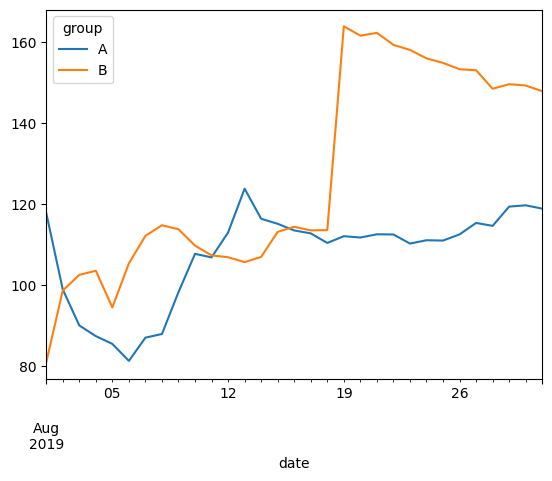

In [44]:
#Creamos una pivot table para graficar
daily_avgs_by_group = (
    daily_avgs
    .pivot_table(
        index='date',
        columns='group',
        values='avg_revenue'
    )
)

daily_avgs_by_group.plot(kind='line')

Podemos observar mucha fluctuación en los tamaños de pedidos en ambos grupos, sin embargo se llega a una estabilidad a partir del día 13 de agosto en el grupo A y el 19 de agosto en el grupo B. Por lo que podemos considerar que la estabilidad de pedidos en ambos grupos se presenta el 19 de agosto. El tamaño promedio de pedidos es mayor en el grupo B.

### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

In [45]:
daily_avgs_by_group.head()


group,A,B
date,,
2019-08-01,117.840000,81.000000
2019-08-02,98.982051,98.693023
2019-08-03,90.087302,102.552542
2019-08-04,87.462821,103.572000
2019-08-05,85.535922,94.519388


In [46]:
#Aplicaremos la formula del cambio relativo simplificada: B/A - 1
daily_avgs_by_group['relative_change'] = daily_avgs_by_group['B'] / daily_avgs_by_group['A'] - 1
daily_avgs_by_group.head()

group,A,B,relative_change
date,,,
2019-08-01,117.840000,81.000000,-0.312627
2019-08-02,98.982051,98.693023,-0.002920
2019-08-03,90.087302,102.552542,0.138368
2019-08-04,87.462821,103.572000,0.184183
2019-08-05,85.535922,94.519388,0.105026


<Axes: xlabel='date'>

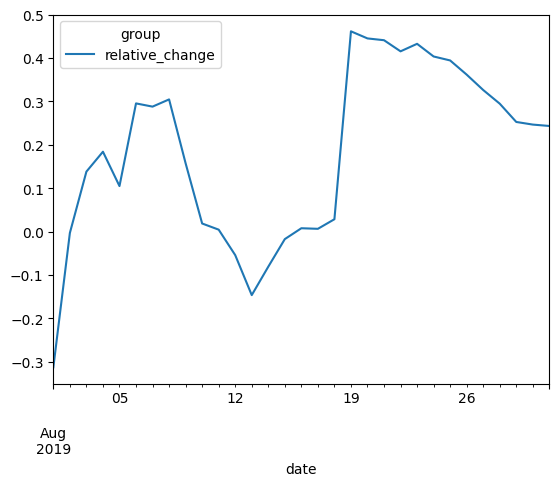

In [47]:
#Graficamos la diferencia relativa
daily_relative_changes = (
    daily_avgs_by_group
    .pivot_table(
        index='date',
        values='relative_change'
    )
)

daily_relative_changes.plot(kind='line')

Observamos que si hay cambios significativos en el promedio acumulado de ambos grupos, la doferencia relativa explica como cambió un grupo respecto al otro y el comportamiento de este se encuentra acorde a los promedios de ambos grupos, donde se destaca el pico del 19 de agosto.

### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.


In [48]:
#Encontrramos el numero de compradores
daily_buyers = (
    orders_
    .groupby(['date', 'group'])['visitorId']
    .nunique()
    .reset_index()
    .rename(columns={'visitorId': 'n_buyers'})
)

#visitas  y daily buyers acumuladas agrupa y por fecha
conver = pd.merge(daily_buyers, visits, on=['date', 'group'], how='left')
conver.head()

,date,group,n_buyers,visits
0,2019-08-01,A,20,719
1,2019-08-01,B,20,713
2,2019-08-02,A,19,619
3,2019-08-02,B,23,581
4,2019-08-03,A,24,507


In [49]:
#Agregamos las columnas con valores acumulados 
conver['cumulative_visitors'] = conver.sort_values(by='date').groupby('group')['visits'].cumsum()
conver['cumulative_buyers'] = conver.sort_values(by='date').groupby('group')['n_buyers'].cumsum()
#Calculamos la conversión
conver['cumlative_conversion'] = conver['cumulative_buyers'] / conver['cumulative_visitors']

conver.head()

,date,group,n_buyers,visits,cumulative_visitors,cumulative_buyers,cumlative_conversion
0,2019-08-01,A,20,719,719,20,0.027816
1,2019-08-01,B,20,713,713,20,0.028050
2,2019-08-02,A,19,619,1338,39,0.029148
3,2019-08-02,B,23,581,1294,43,0.033230
4,2019-08-03,A,24,507,1845,63,0.034146


<Axes: xlabel='date'>

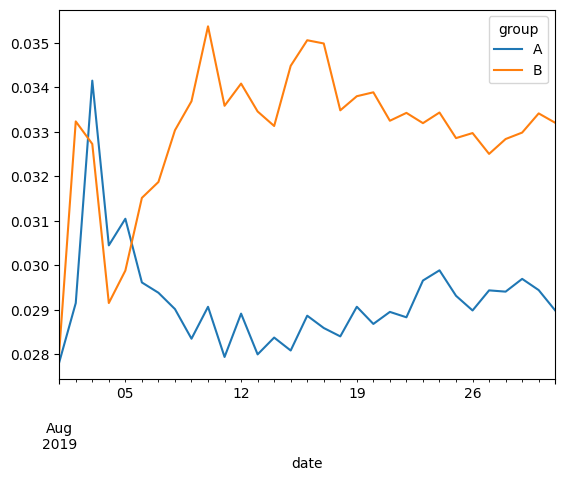

In [50]:
#Graficamos ek indice de conversión
convert_pivot = (
    conver
    .pivot_table(
        index='date',
        columns='group',
        values='cumlative_conversion'
    )
)

convert_pivot.plot(kind='line')

Observamos que hay una diferencia significativa en el grupo B, el cual cuenta con mayores conversiones acumuladas.

### Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

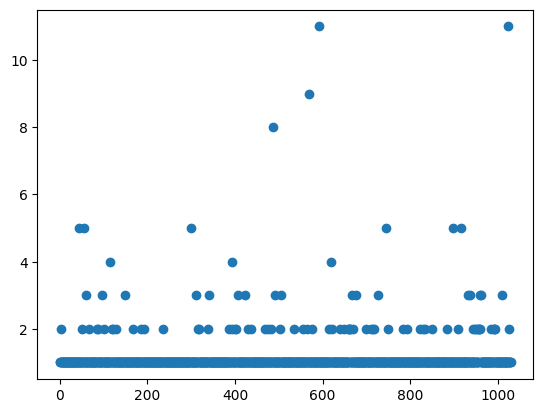

In [51]:
#Creamos una tabla con las ordenes por usuarios agrupando el grupo, revenue y fecha
ordersByUsers = (
    orders_.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
x_values = pd.Series(range(0,len(ordersByUsers)))
#Graficamos
plt.scatter(x_values, ordersByUsers['transactionId'])

Nos encontramos con que la mayoría de los usuarios hacen solamente un pedido, son pocos los que realizan dos y raramente 3.

### Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [52]:
percen = orders_.groupby('visitorId')['transactionId'].count().reset_index()
percen['transactionId'].nunique()

8

In [53]:
print(np.percentile(percen['transactionId'], [95, 99, 100]))

[ 2.  4. 11.]


Los usuarios hacen en su mayoría un solo pedido, estando dentro del 95% los usuarios con un pedido. Por otro lado los usuarios con dos pedidos son menores y significativamente menores los usuarios con 3 pedidos. No encontramos anomalías entre los valores, sin embargo hay que tomar en cuenta que se realizó un filtrado al incio del proyecto donde se eliminaron los usuarios que estaban en ambos grupos (pudiendo ser estos los que hacían más pedidos)

### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

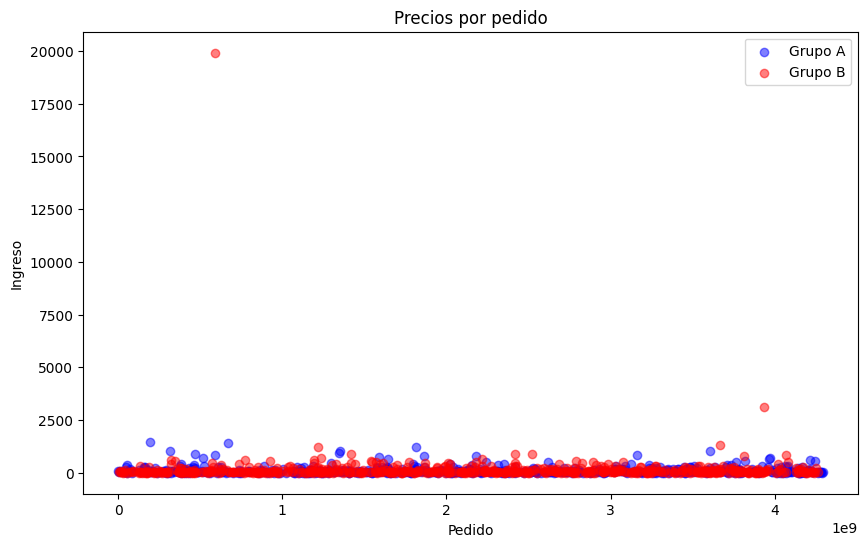

In [54]:
# Calcular el ingreso total por pedido
orders_by_transaction = orders_.groupby(['transactionId', 'visitorId', 'group'], as_index=False).agg({'revenue': 'sum'})

# Separar los datos en dos conjuntos: grupo A y grupo B
group_a = orders_by_transaction[orders_by_transaction['group'] == 'A']
group_b = orders_by_transaction[orders_by_transaction['group'] == 'B']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Graficar grupo A
plt.scatter(group_a['transactionId'], group_a['revenue'], color='blue', label='Grupo A', alpha=0.5)

# Graficar grupo B
plt.scatter(group_b['transactionId'], group_b['revenue'], color='red', label='Grupo B', alpha=0.5)

# Etiquetas y título
plt.xlabel('Pedido')
plt.ylabel('Ingreso')
plt.title('Precios por pedido')
plt.legend()

# Mostrar gráfico
plt.show()

Nos encontramos con un valor atipico, el cual afecta a todo el gráfico. Fuera de ello parece ser que los precios no presentan gran variación según el revenue de cada pedido.

### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.


In [55]:
percen_price = orders_.groupby(['transactionId', 'visitorId', 'group'], as_index=False).agg({'revenue': 'sum'})
print(np.percentile(percen_price['revenue'], [95, 99, 100]))

[  435.54    900.904 19920.4  ]


Encontramos que si hay anomalias, valores que salen mucho del resto. En este caso entre el 99 y el 100 se encuentran valores altos, mientras que el 95% de los valores son inferiores a 415.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.


In [56]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(
    conver.query('group == "A"')['cumlative_conversion'],
    conver.query('group == "B"')['cumlative_conversion']
)

p_value

#deteminamos alfa
alpha = 0.05
if p_value < alpha:
    print("No hay significancia")
else:
    print("Si hay significancia estadística")

No hay significancia


Nos encontramos con que no hay una diferencia significativa entre ambos grupos de acuerdo con esta prueba.

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [57]:
from scipy.stats import ttest_ind

#Dividimos los grupos ypromediamos la columna revenue
stat, p_value = ttest_ind(
    orders_.query('group == "A"')['revenue'].mean(),
    orders_.query('group == "B"')['revenue'].mean()
)

p_value

#deteminamos alfa
alpha = 0.05
if p_value < alpha:
    print("No hay significancia")
else:
    print("Si hay significancia estadística")

Si hay significancia estadística


C:\Users\erika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:6558: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


Nos encontramos con que si hay significancia estadística, probaremos la prueba Mann Witney dado que los datos aquí parceen ser demasiado similares desencadenando una posible pérdida de valores.

In [58]:
#Definimos los gruposy su promedio
group_a = orders_.query('group == "A"')['revenue'].mean()
group_b = orders_.query('group == "B"')['revenue'].mean()

#Importamos la prueba
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(group_a, group_b)

print(f'Estadístico U: {stat}')
print(f'Valor p: {p_value}')

# Declaramos la significancia
if p_value < 0.05:
    print("Hay una diferencia significativa entre los grupos.")
else:
    print("No hay una diferencia significativa entre los grupos.")

Estadístico U: 0.0
Valor p: 1.0
No hay una diferencia significativa entre los grupos.


### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.


In [59]:
#Estableceremos con el 99%
percentile_conver = conver['cumlative_conversion'].quantile(0.99)

#filtramos
conver_filtered = conver[conver['cumlative_conversion'] <= percentile_conver]

#Aplicamos la prueba
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(
    conver_filtered.query('group == "A"')['cumlative_conversion'],
    conver_filtered.query('group == "B"')['cumlative_conversion']
)

p_value

#deteminamos alfa
alpha = 0.05
if p_value < alpha:
    print("No hay significancia")
else:
    print("Si hay significancia estadística")

No hay significancia


Este resultado coincide con los datos en bruto, no hay significancia

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.


In [60]:
#Estableceremos con el 99%
percentile_orders = orders_['revenue'].quantile(0.99)

#filtramos
orders_filtered = orders_[orders_['revenue'] <= percentile_orders]

#Definimos los grupos y su promedio
group_a = orders_filtered.query('group == "A"')['revenue'].mean()
group_b = orders_filtered.query('group == "B"')['revenue'].mean()

#Importamos la prueba
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(group_a, group_b)

print(f'Estadístico U: {stat}')
print(f'Valor p: {p_value}')

# Declaramos la significancia
if p_value < 0.05:
    print("Hay una diferencia significativa entre los grupos.")
else:
    print("No hay una diferencia significativa entre los grupos.")

Estadístico U: 0.0
Valor p: 1.0
No hay una diferencia significativa entre los grupos.


Una vez más, tenemos como resultado que no hay significancia estadística entre ambos grupos

### Toma una decisión basada en los resultados de la prueba. 
Las decisiones posibles son: 
1. Para la prueba, considera a uno de los grupos como líder. 
2. Para la prueba, concluye que no hay diferencia entre los grupos. 
3. Continúa la prueba.

Para responder esta pregunta, haremos un p_value acumulado en el que consideraremos las conversiones acumuladas a través de los días y posteriormente graficaremos el mismo acumulado. Ya que las gráficas simples no son tan representativas visualmente, una gráfica acumulada nos permitirá ver los cambios en las conversiones y compras a lo largo del experimento.

C:\Users\erika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:6558: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


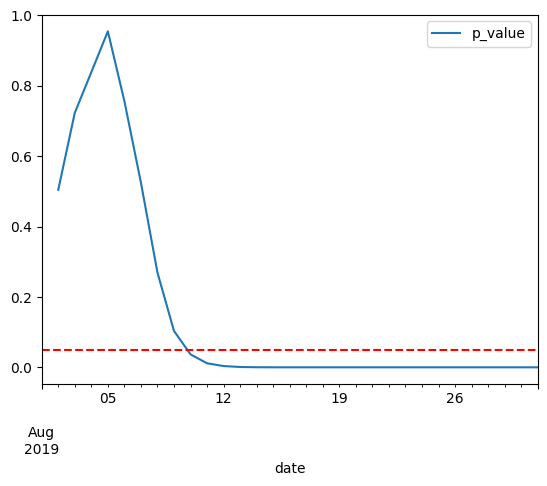

In [61]:
#Vamos a realizar una prueba para los p_values acumulados
#Agregamos almacenamiento para valores de p_value y días
p_values = []
days = []

#Creamos un bucle que considere los valores de los días anteriores para tener los acumulados
for day in conver['date'].unique():
    tmp_data = conver[conver['date'] <= day]
    
    _, p_value = ttest_ind(
        tmp_data.query('group == "A"')['cumlative_conversion'],
        tmp_data.query('group == "B"')['cumlative_conversion']
    )
    
    p_values.append(p_value)
    days.append(day)

daily_ttests = pd.DataFrame({
    'date': days,
    'p_value': p_values
})

#Graficamos los valores del p_value
daily_ttests.plot(kind='line', x='date', y='p_value')
#Agregamos una linea para definir la significancia de alpha
plt.gca().axhline(y=0.05, color='red', ls='--')
plt.show()

El el gráfico la linea azul es el valor de p_value acumulado, por lo que vemos se estabiliza a partir del 16 de agosto y en las fechas posteriores se mantiene en 0, lo que nos muestra una significancia nula entre las conversiones acumuladas de ambos grupos. Igualmente nos deja observar que por la estabilidad de la linea no es necesario continuar con la prueba ya que no parecen haber fluctuaciones a lo largo del tiempo. La linea roja es nuestro valor alpha del 0.05 para medir la significancia y una vez que los datos están estables se encuentran por debajo de esa linea. 
En conclusión podemos recomendar parar la prueba y afirmar que no hay diferencia entre ambos grupos.